# Lesson 02 - Data Visualization Complementary Views 
Version: Jun-2019

## Author - Priya Asokan



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g., small multiples) on both categorical and numeric variables.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)
headcount_df.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


In [3]:
headcount_df.head()

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,9/16/2011,6,0,0,1,0,6,47
1,BA,9/16/2011,7,0,0,1,0,6,47
2,BA,9/16/2011,8,0,0,1,0,6,47
3,BA,9/16/2011,9,0,0,1,0,6,47
4,BA,9/16/2011,10,0,1,0,0,6,47


In [4]:
#Correlation matrix for all the numeric variables
headcount_df.corr()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
Hour,1.000000,0.150271,0.134911,-0.165562,0.171027,-0.000641,-0.000149
TablesOcc,0.150271,1.000000,0.973488,0.091488,0.932536,0.029641,0.020292
TablesOpen,0.134911,0.973488,1.000000,0.124094,0.889106,0.031448,0.029192
TablesClosed,-0.165562,0.091488,0.124094,1.000000,0.043878,-0.038390,-0.028820
HeadCount,0.171027,0.932536,0.889106,0.043878,1.000000,0.031059,0.014838
DayOfWeek,-0.000641,0.029641,0.031448,-0.038390,0.031059,1.000000,-0.002442
DayNumber,-0.000149,0.020292,0.029192,-0.028820,0.014838,-0.002442,1.000000


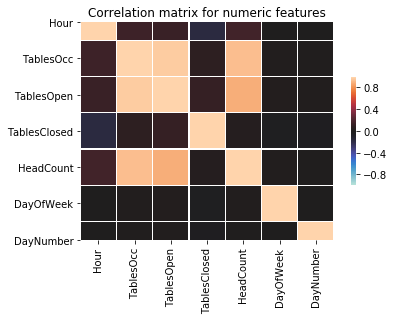

In [5]:
# HeatMap to show correlation matrix
# From this map -'Tables occupied' and 'Tables open' are highly correlated
# Analysis: 'Tables Occupied' and 'Head Count' are highly correlated. There is no negative correlation.
sns.heatmap(headcount_df.corr(), vmax=1.0,vmin = -1, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')
plt.show()

Text(0.5, 1.0, 'Max & Min Head Count per Day of Week')

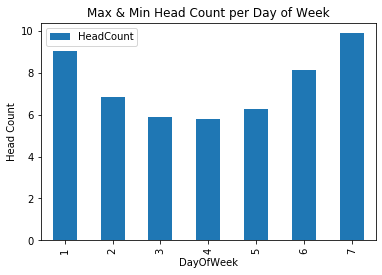

In [6]:
# Pivot table to get the maximum headcount for the day of week and minimum head count for the day of week
# Analysis: This table shows Saturday(DayOfWeek = 7) and Sunday(DayOfWeek = 1) has the maximum head count 
# Wednesday has minimum head count
headcount_df.pivot_table(['HeadCount'], index = 'DayOfWeek').plot(kind='bar')
plt.ylabel('Head Count')
plt.title('Max & Min Head Count per Day of Week')

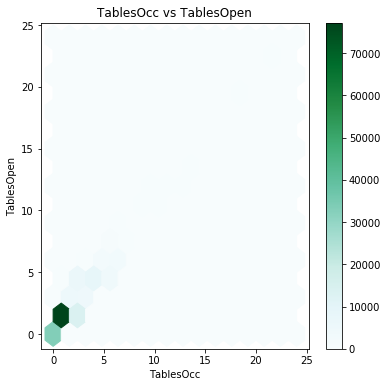

In [7]:
# Hexbin plot here shows Tables Open increases tables occupied also increases.
# Analysis: There are more tables opened and occupied  between 2 to 4.
ax = plt.figure(figsize=(6, 6)).gca() # define axis
headcount_df.plot.hexbin(x = 'TablesOcc', y = 'TablesOpen', gridsize = 15, ax = ax)
ax.set_title('TablesOcc vs TablesOpen') # Give the plot a main title
ax.set_ylabel('TablesOpen')# Set text for y axis
ax.set_xlabel('TablesOcc')# Set text for x axis
plt.show()

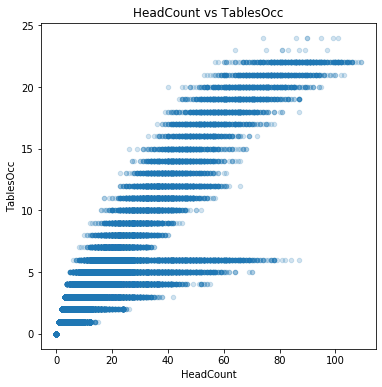

In [8]:
# Scatter plot to show the head count and tables occupied.
#Analysis: More head count when large number of tables are occupied.
ax = plt.figure(figsize=(6, 6)).gca() # define axis
headcount_df.plot.scatter(x = 'HeadCount', y = 'TablesOcc', ax = ax, alpha = 0.2)
ax.set_title('HeadCount vs TablesOcc') # Give the plot a main title
ax.set_ylabel('TablesOcc')# Set text for y axis
ax.set_xlabel('HeadCount')# Set text for x axis
plt.show()

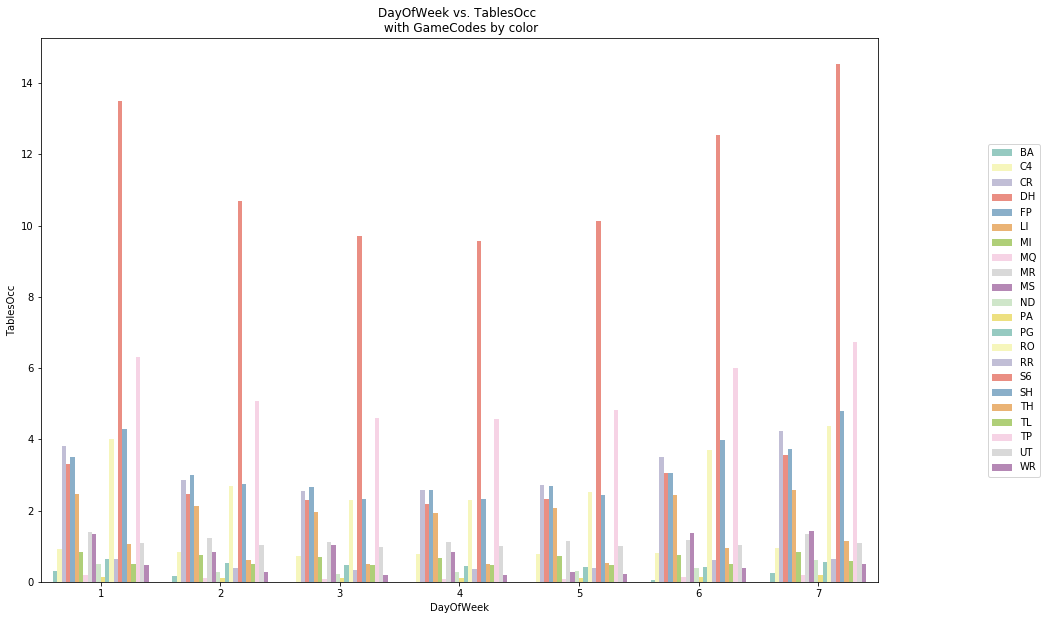

In [9]:
# BarPlot-Avergae number of occupied tables per day is calculated for each game.
# Analysis: Game S6 is found to have the most occupied tables
ax = plt.figure(figsize=(15, 10))
g = sns.barplot(x = 'DayOfWeek', y = 'TablesOcc', 
           data = headcount_df,             
           palette="Set3",
           hue = "GameCode",
           ci = None)       
plt.xlabel('DayOfWeek')# Set text for x axis
plt.ylabel('TablesOcc')# Set text for y axis
g.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1) # Set hue box to the right of the plot
plt.title('DayOfWeek vs. TablesOcc \n with GameCodes by color')# Set text for title
plt.show()

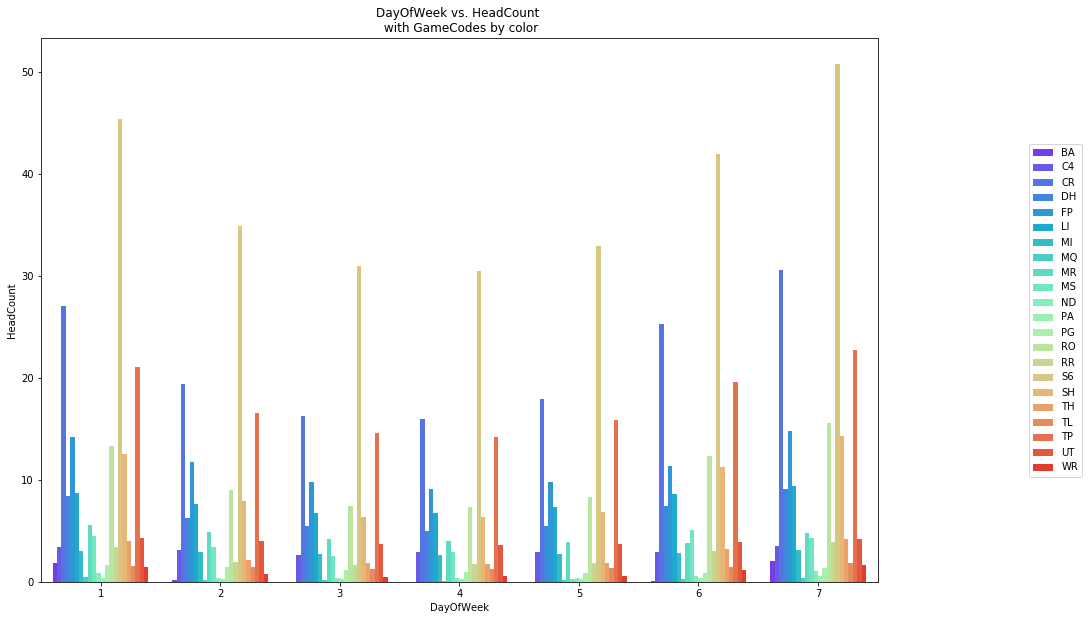

In [10]:
#BarPlot - Average number of head count per day is calculated for each game
# Analysis: Game S6 is found to have the most head counts
ax = plt.figure(figsize=(15, 10))
g = sns.barplot(x = 'DayOfWeek', y = 'HeadCount', 
           data = headcount_df,             
           palette="rainbow",
           hue = "GameCode",
           ci = None)       
plt.xlabel('DayOfWeek') #Set text for x axis
plt.ylabel('HeadCount') #Set text for y axis
g.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1) #Set the hue box to right
plt.title('DayOfWeek vs. HeadCount \n with GameCodes by color') #Set title for plot
plt.show()


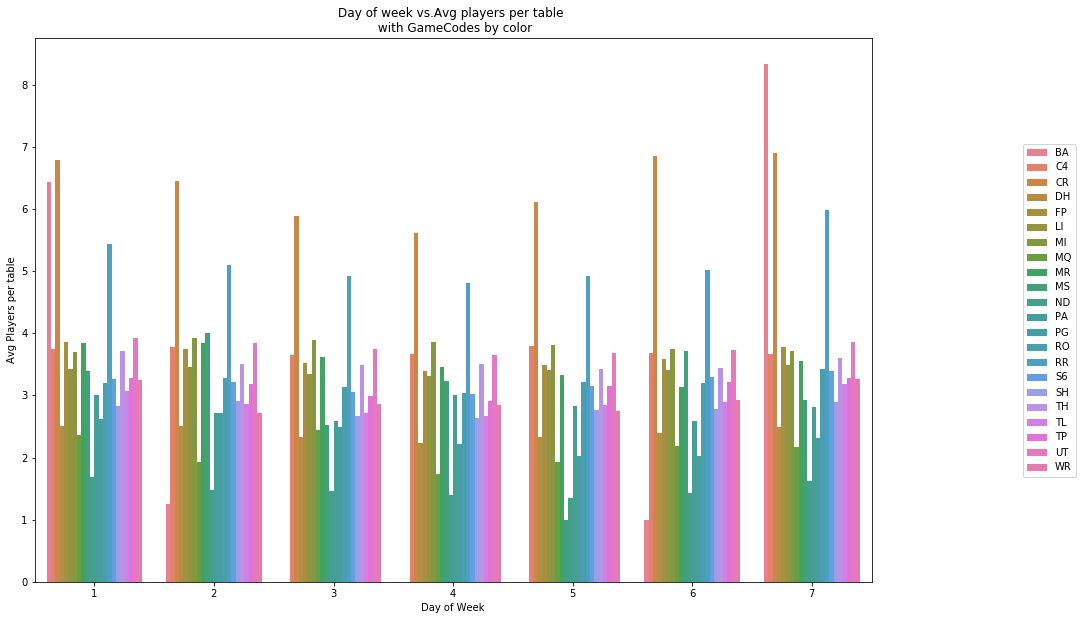

In [11]:
# Bar plot -Average number of players per table for each game
# Density of each occupied table is obtained by taking average number of headcount player over average number of occupied tables
# for each game.(Created a new column - PlayersPerTable)
# Analysis: Game 'CR' has the most head count per occupied table
ax = plt.figure(figsize=(15, 10))
headcount_df.loc[:, 'PlayersPerTable'] = headcount_df.loc[:,'HeadCount'] / headcount_df.loc[:,'TablesOcc']
g = sns.barplot(x = 'DayOfWeek', y = 'PlayersPerTable', 
           data = headcount_df,             
           palette="husl",
           hue = "GameCode",
           ci = None)       
plt.xlabel('Day of Week') #Set text for x axis
plt.ylabel('Avg Players per table') #Set text for y axis
g.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1) #Set Hue box to the right
plt.title('Day of week vs.Avg players per table \n with GameCodes by color') #Set the title for plot
plt.show()

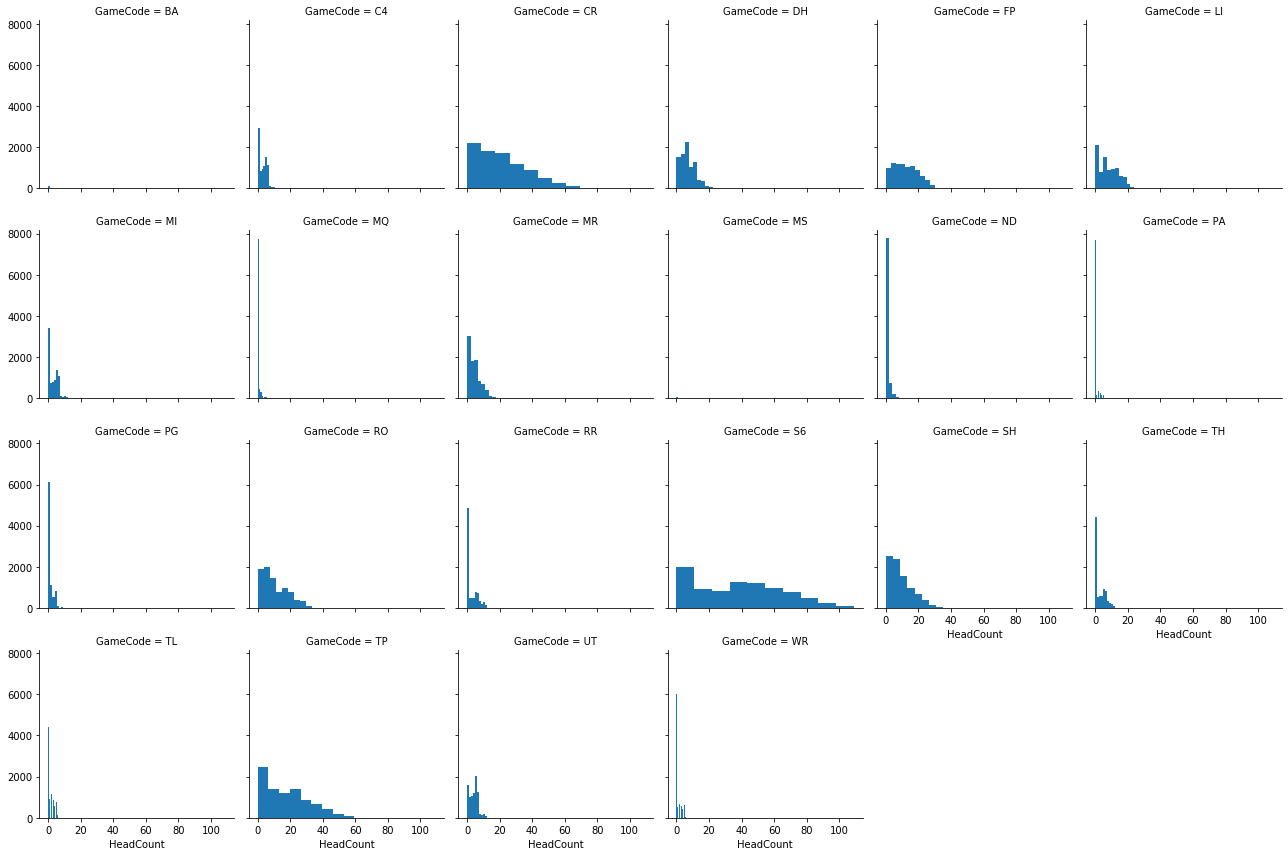

In [12]:
# Facet Plot to find the game that attracts the customers the most when it is offered.
# Game 'S6' seems to be more popular with largest head count
gr = sns.FacetGrid(headcount_df, col="GameCode",col_wrap=6)
gr = gr.map(plt.hist, "HeadCount")

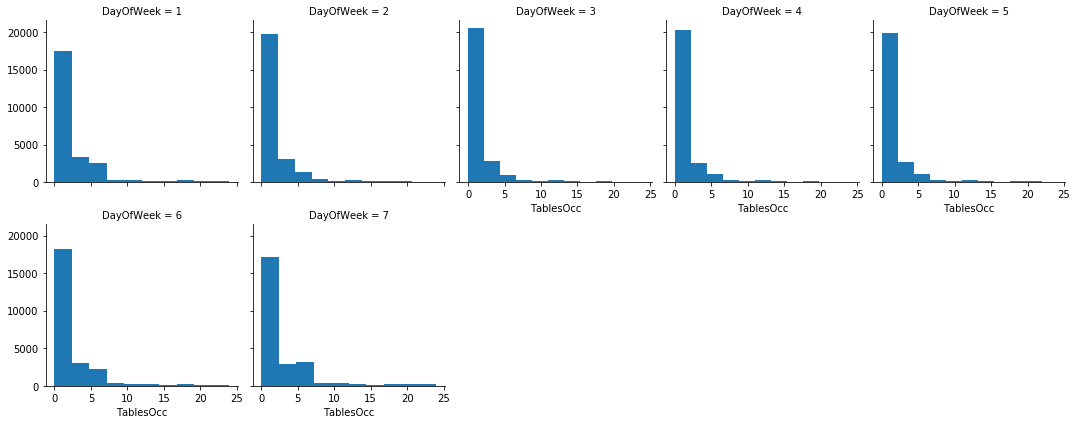

In [13]:
# Facet Plot to find the number of tables occupied for a given day.
# Game 'S6' seems to be more popular with largest head count
gr = sns.FacetGrid(headcount_df, col="DayOfWeek",col_wrap=5)
gr = gr.map(plt.hist, "TablesOcc")